In [29]:
%cd /content/drive/MyDrive/Colab Notebooks/DeepLearning_AI2(2310)

/content/drive/MyDrive/Colab Notebooks/DeepLearning_AI2(2310)


###목표
- 개, 고양이 이미지(사진)을 배열로 변환하는 작업을 진행해보자(이미지 데이터 전처리)
  - 압축된 형식의 배열로 저장: npz
  - 대용량 데이터를 압축형태로 정리해두면 클라우드 환경에 쉽게 업로드, 다운로드 가능
해짐(관리가 편해짐
  - 저장소의 공간을 적게 차지(공간 사용 효율 좋아짐)
  

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# 압축 폴더 해제
# 2. 이미지 한장씩기 접근
# 3. 이미지 크기 조정
# 4. 배열 변환
# 5.  모든 이미지를 npz 형식으로 저장

In [31]:
from zipfile import ZipFile
import os
import numpy as np
from PIL import Image

In [32]:
# 압축 파일 경로 지정
zip_file_path = './data/cats_and_dogs_filtered.zip'

# 압축 파일 내용 해제
with ZipFile(zip_file_path, 'r') as f:
    f.extractall('./data/')

In [33]:
# 훈련 및 테스트 데이터 세트의 경로 정의
train_cats_dir = './data/cats_and_dogs_filtered/train/cats'
train_dogs_dir = './data/cats_and_dogs_filtered/train/dogs'
test_cats_dir = './data/cats_and_dogs_filtered/test/cats'
test_dogs_dir = './data/cats_and_dogs_filtered/test/dogs'

# 각 폴더의 이미지 파일 이름 목록
train_cats_files = os.listdir(train_cats_dir)
train_dogs_files = os.listdir(train_dogs_dir)
test_cats_files = os.listdir(test_cats_dir)
test_dogs_files = os.listdir(test_dogs_dir)

# 각 폴더의 이미지 파일 수 확인
print(f"훈련용 고양이 이미지 파일 수: {len(train_cats_files)}")
print(f"훈련용 강아지 이미지 파일 수: {len(train_dogs_files)}")
print(f"테스트용 고양이 이미지 파일 수: {len(test_cats_files)}")
print(f"테스트용 강아지 이미지 파일 수: {len(test_dogs_files)}")


훈련용 고양이 이미지 파일 수: 1000
훈련용 강아지 이미지 파일 수: 1000
테스트용 고양이 이미지 파일 수: 500
테스트용 강아지 이미지 파일 수: 500


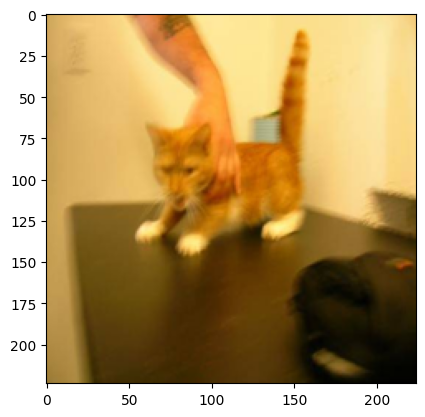

In [34]:
# 예제: 하나의 이미지를 로드하고 전처리
# 이 코드에서 변수 이름 오류를 수정하겠습니다.
# 첫 번째 훈련용 고양이 이미지 파일 경로
temp_path = os.path.join(train_cats_dir, train_cats_files[0])

# 이미지 열기 및 크기 조정
img = Image.open(temp_path).resize((224, 224))

# 이미지를 넘파이 배열로 변환
img_array = np.array(img)

# 이미지 표시
plt.imshow(img_array)
plt.show()


In [35]:
# 이미지 전처리 함수 생성
def preprocess_imgs(folder_path, file_names, img_size=(224, 224)):
    # 이미지 데이터를 저장할 리스트
    imgs = []

    for file_name in file_names:
        # 이미지 파일 경로
        img_path = os.path.join(folder_path, file_name)

        # 이미지 열기 및 크기 조정
        img = Image.open(img_path).resize(img_size)

        # 배열로 변환 (배열로 변환 -> imgs 리스트에 누적)
        img_array = np.array(img)

        # 이미지 데이터 추가
        imgs.append(img_array)

    return np.array(imgs)


In [37]:
# 예제: 훈련 데이터 세트에서 고양이 이미지 전처리
X_train_cats = preprocess_imgs(train_cats_dir, train_cats_files)
print(X_train_cats)
# 나머지 폴더 이미지 변환해보기
X_train_dogs = preprocess_imgs(train_dogs_dir, train_dogs_files)
X_test_cats = preprocess_imgs(test_cats_dir, test_cats_files)
X_test_dogs = preprocess_imgs(test_dogs_dir, test_dogs_files)

[[[[203 164  87]
   [205 166  89]
   [209 170  93]
   ...
   [245 204 120]
   [242 202 122]
   [239 200 121]]

  [[203 164  87]
   [205 166  89]
   [209 170  93]
   ...
   [245 204 121]
   [242 203 123]
   [240 201 122]]

  [[203 164  87]
   [205 166  89]
   [209 170  93]
   ...
   [245 205 122]
   [243 204 124]
   [241 202 123]]

  ...

  [[154 123  56]
   [155 124  57]
   [156 125  58]
   ...
   [  3   3   1]
   [  3   3   1]
   [  3   3   1]]

  [[153 122  55]
   [153 122  55]
   [154 123  56]
   ...
   [  2   2   0]
   [  2   2   0]
   [  2   2   0]]

  [[151 120  53]
   [152 121  54]
   [153 122  55]
   ...
   [  1   1   0]
   [  1   1   0]
   [  1   1   0]]]


 [[[ 39  44  40]
   [ 39  44  41]
   [ 41  45  44]
   ...
   [210 206 180]
   [204 201 168]
   [200 197 162]]

  [[ 40  45  41]
   [ 40  44  42]
   [ 41  45  44]
   ...
   [204 200 174]
   [200 197 166]
   [197 194 160]]

  [[ 39  44  40]
   [ 39  43  41]
   [ 38  42  42]
   ...
   [198 193 168]
   [199 195 165]
   [202 197

In [38]:
# train cats, dogs 병합
X_train = np.concatenate((X_train_cats, X_train_dogs))

X_test = np.concatenate((X_test_cats, X_test_dogs))

#크기확인
print(X_train.shape)
print(X_test.shape)

(2000, 224, 224, 3)
(1000, 224, 224, 3)


In [39]:
# 답 데이터 생성하기
# numpy 1차원 배열로 생성
# cat 0, dog 1 답 데이터 정리
y_train = np.array([0]* 1000 + [1] * 1000)
y_test = np.array([0]* 500 + [1] * 500)
print(y_train.shape, y_test.shape)

(2000,) (1000,)


In [41]:
# 데이터 세팅 완료 ! -> npz
# X_trian, X_test, y_train, y_test -> npz
np.savez_compressed('./data/np_cat_vs_dogs.npz',
                    X_train = X_train,
                    X_test = X_test,
                    y_train = y_train,
                    y_test = y_test)